# SmartBridge Assignment 3 (Applied Data Science)
### by - Suryakant Patwardhan (20BCE10783)
---
### Building a Regression Model
**Problem Statement:** House Price Prediction\
**Description:** House price prediction is a common problem in the real estate industry and involves predicting the selling price of a house based on various features and attributes. The problem is typically approached as a regression problem, where the target variable is the price of the house, and the features are various attributes of the house.

The features used in house price prediction can include both quantitative and categorical variables, such as the number of bedrooms, house area, bedrooms, furnished, nearness to main road, and various amenities such as a garage and other factors that may influence the value of the property.

Accurate predictions can help agents and appraisers price homes correctly, while
homeowners can use the predictions to set a reasonable asking price for their properties. Accurate house price prediction can also be useful for buyers who are looking to make informed decisions about purchasing a property and obtaining a fair price for their investment.

**Tasks:**
1. Download the dataset: [Dataset](https://drive.google.com/file/d/1NtOKehSz8SiVnk0cPZX5TFndug4SYL5T/view)
2. Load the dataset into the tool.
3. Perform Below Visualizations.
  - Univariate Analysis
  - Bi-Variate Analysis
  - Multi-Variate Analysis
4. Perform descriptive statistics on the dataset.
5. Check for Missing values and deal with them.
6. Find the outliers and replace them outliers
7. Check for Categorical columns and perform encoding.
8. Split the data
into dependent and independent variables.
9. Scale the independent
variables
10. Split the data into training and testing
11. Build the Model
12. Train the Model
13. Test the Model
14. Measure the performance using Metrics.

## Step 1 and 2

In [1]:
# completes tasks (1) and (2)
import pandas as pd

link_to_dataset='https://drive.google.com/file/d/1NtOKehSz8SiVnk0cPZX5TFndug4SYL5T/view'
url='https://drive.google.com/uc?id=' + link_to_dataset.split('/')[-2] # extracts `file id` from `drive link`
df = pd.read_csv(url)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,furnished


## Step 3
Visualizations

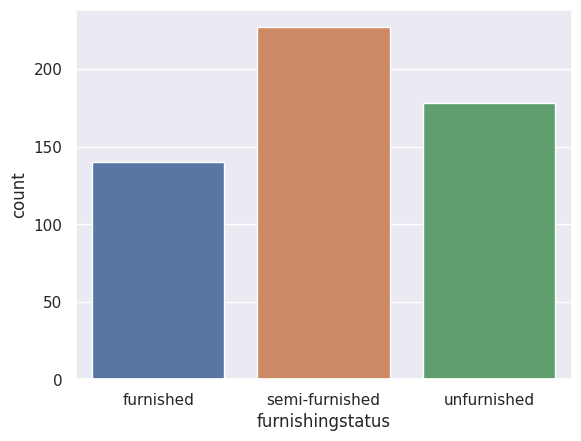

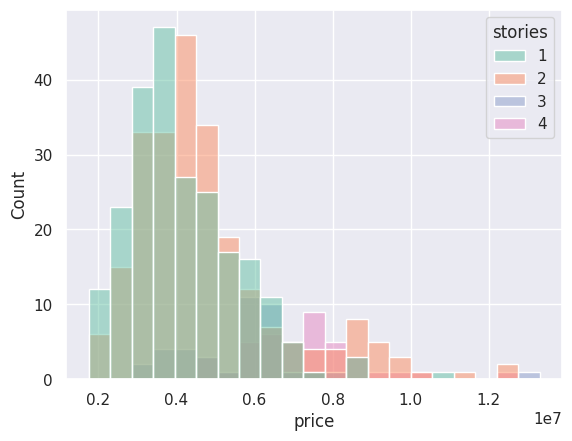

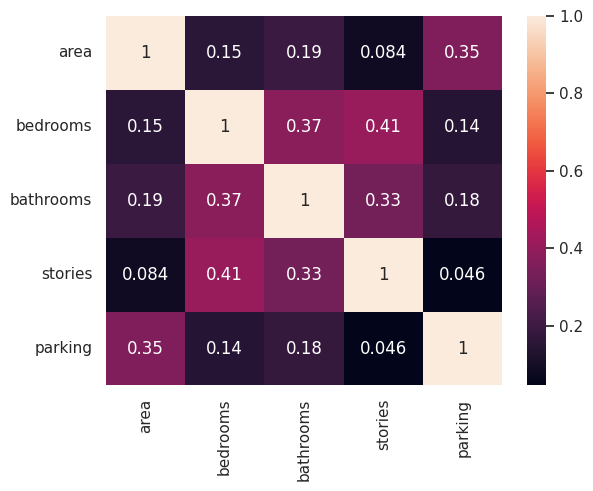

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_theme()
# univariate
sns.countplot(data=df, x='furnishingstatus')
plt.show()

# bivariate
sns.histplot(data=df, x='price', hue='stories', palette='Set2')
plt.show()

# multivariate
def is_numeric(val):
  try:
    float(val)
    return True
  except ValueError:
    return False
corr = (
      df.loc[:, ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']]
        .applymap(lambda v: float(v) if is_numeric(v) else np.nan)
        .dropna()
    ).corr()
sns.heatmap(corr, annot=True)
plt.show()

## Step 4

In [3]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


## Step 5
*We do not have any missing values so we need not handle them*

In [4]:
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
furnishingstatus    0
dtype: int64

## Step 6
Handling outliers


In [5]:
def replace_outliers(df, column_name, z_thresh=3):
  ''' replaces outliers from numerical columns of the specified dataset '''
  median = df[column_name].median()
  std = df[column_name].std()
  outliers = (df[column_name] - median).abs() > z_thresh * std
  df.loc[outliers, column_name] = np.nan
  df[column_name].fillna(median, inplace=True)

numeric_cols = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
for val in numeric_cols:
  replace_outliers(df, val)

df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.660573e+06,4983.533945,2.954128,1.244037,1.805505,0.627523
std,1.671084e+06,1851.792053,0.714674,0.429909,0.867492,0.794498
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.600000e+06,6240.000000,3.000000,1.000000,2.000000,1.000000
max,9.870000e+06,10700.000000,5.000000,2.000000,4.000000,2.000000


## Step 7
Check for Categorical columns and perform encoding.

In [6]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
cat_cols = ["mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "furnishingstatus"]
for col in cat_cols:
  df[col] = le.fit_transform(df[col])
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,4340000.0,7420.0,4.0,2.0,3.0,1,0,0,0,1,2.0,0
1,4340000.0,8960.0,4.0,1.0,4.0,1,0,0,0,1,0.0,0
2,4340000.0,9960.0,3.0,2.0,2.0,1,0,1,0,0,2.0,1
3,4340000.0,7500.0,4.0,2.0,2.0,1,0,1,0,1,0.0,0
4,4340000.0,7420.0,4.0,1.0,2.0,1,1,1,0,1,2.0,0


## Step 8
Split the data into dependent and independent variables.


In [7]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

In [8]:
X.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,7420.0,4.0,2.0,3.0,1,0,0,0,1,2.0,0
1,8960.0,4.0,1.0,4.0,1,0,0,0,1,0.0,0
2,9960.0,3.0,2.0,2.0,1,0,1,0,0,2.0,1
3,7500.0,4.0,2.0,2.0,1,0,1,0,1,0.0,0
4,7420.0,4.0,1.0,2.0,1,1,1,0,1,2.0,0


In [9]:
y.head()

0    4340000.0
1    4340000.0
2    4340000.0
3    4340000.0
4    4340000.0
Name: price, dtype: float64

## Step 9
Scale the independent variables

In [10]:
from sklearn.preprocessing import MinMaxScaler

scalerX = MinMaxScaler()
scalerY = MinMaxScaler()
X = scalerX.fit_transform(X) # scaled independent variables
y = scalerY.fit_transform(y.values.reshape(-1, 1))
print(X)

[[0.63756906 0.75       1.         ... 1.         1.         0.        ]
 [0.80773481 0.75       0.         ... 1.         0.         0.        ]
 [0.91823204 0.5        1.         ... 0.         1.         0.5       ]
 ...
 [0.21767956 0.25       0.         ... 0.         0.         1.        ]
 [0.13922652 0.5        0.         ... 0.         0.         0.        ]
 [0.24309392 0.5        0.         ... 0.         0.         1.        ]]


## Step 10
Split the data into training and testing

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)
print(X_train.shape)
print(X_test.shape)

(408, 11)
(137, 11)


## Step 11
Build the Model

In [12]:
from sklearn.linear_model import LinearRegression

mlr = LinearRegression() # Multiple Linear Regression

## Step 12
Train the Model

In [13]:
mlr.fit(X_train, y_train)
mlr.coef_

array([[ 0.25123092,  0.0557837 ,  0.09716215,  0.15652278,  0.07253694,
         0.0472812 ,  0.05483313,  0.13413576,  0.09010146,  0.0753866 ,
        -0.04096298]])

## Step 13
Test the Model


In [14]:
y_pred = mlr.predict(X_test)

## Step 14
Measure the performance using Metrics.

In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print(np.sqrt(mean_squared_error(y_test, y_pred)))
print(mean_absolute_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

0.1210978686893705
0.09294387861749337
0.6207242815334535
